<h1>
    Polymer Prediction Contest
</h1>

In [1]:
#Read in SMILES data

import pandas as pd
from IPython.display import display

# path for local use in same directory
path = "train.csv"
path2 = "test.csv"

df = pd.read_csv(path) # main training data for model
sdf = pd.read_csv(path2) # test data for model
display(df)

,id,SMILES,Tg,FFV,Tc,Density,Rg
0,87817,*CC(*)c1ccccc1C(=O)OCCCCCC,NaN,0.374645,0.205667,NaN,NaN
1,106919,*Nc1ccc([C@H](CCC)c2ccc(C3(c4ccc([C@@H](CCC)c5...,NaN,0.370410,NaN,NaN,NaN
2,388772,*Oc1ccc(S(=O)(=O)c2ccc(Oc3ccc(C4(c5ccc(Oc6ccc(...,NaN,0.378860,NaN,NaN,NaN
3,519416,*Nc1ccc(-c2c(-c3ccc(C)cc3)c(-c3ccc(C)cc3)c(N*)...,NaN,0.387324,NaN,NaN,NaN
4,539187,*Oc1ccc(OC(=O)c2cc(OCCCCCCCCCOCC3CCCN3c3ccc([N...,NaN,0.355470,NaN,NaN,NaN
...,...,...,...,...,...,...,...
7968,2146592435,*Oc1cc(CCCCCCCC)cc(OC(=O)c2cccc(C(*)=O)c2)c1,NaN,0.367498,NaN,NaN,NaN
7969,2146810552,*C(=O)OCCN(CCOC(=O)c1ccc2c(c1)C(=O)N(c1cccc(N3...,NaN,0.353280,NaN,NaN,NaN
7970,2147191531,*c1cc(C(=O)NCCCCCCCC)cc(N2C(=O)c3ccc(-c4ccc5c(...,NaN,0.369411,NaN,NaN,NaN
7971,2147435020,*C=C(*)c1ccccc1C,261.662355,NaN,NaN,NaN,NaN


In [2]:
display(sdf)

,id,SMILES
0,1109053969,*Oc1ccc(C=NN=Cc2ccc(Oc3ccc(C(c4ccc(*)cc4)(C(F)...
1,1422188626,*Oc1ccc(C(C)(C)c2ccc(Oc3ccc(C(=O)c4cccc(C(=O)c...
2,2032016830,*c1cccc(OCCCCCCCCOc2cccc(N3C(=O)c4ccc(-c5cccc6...


## Visualizing molecular structures of given training data.

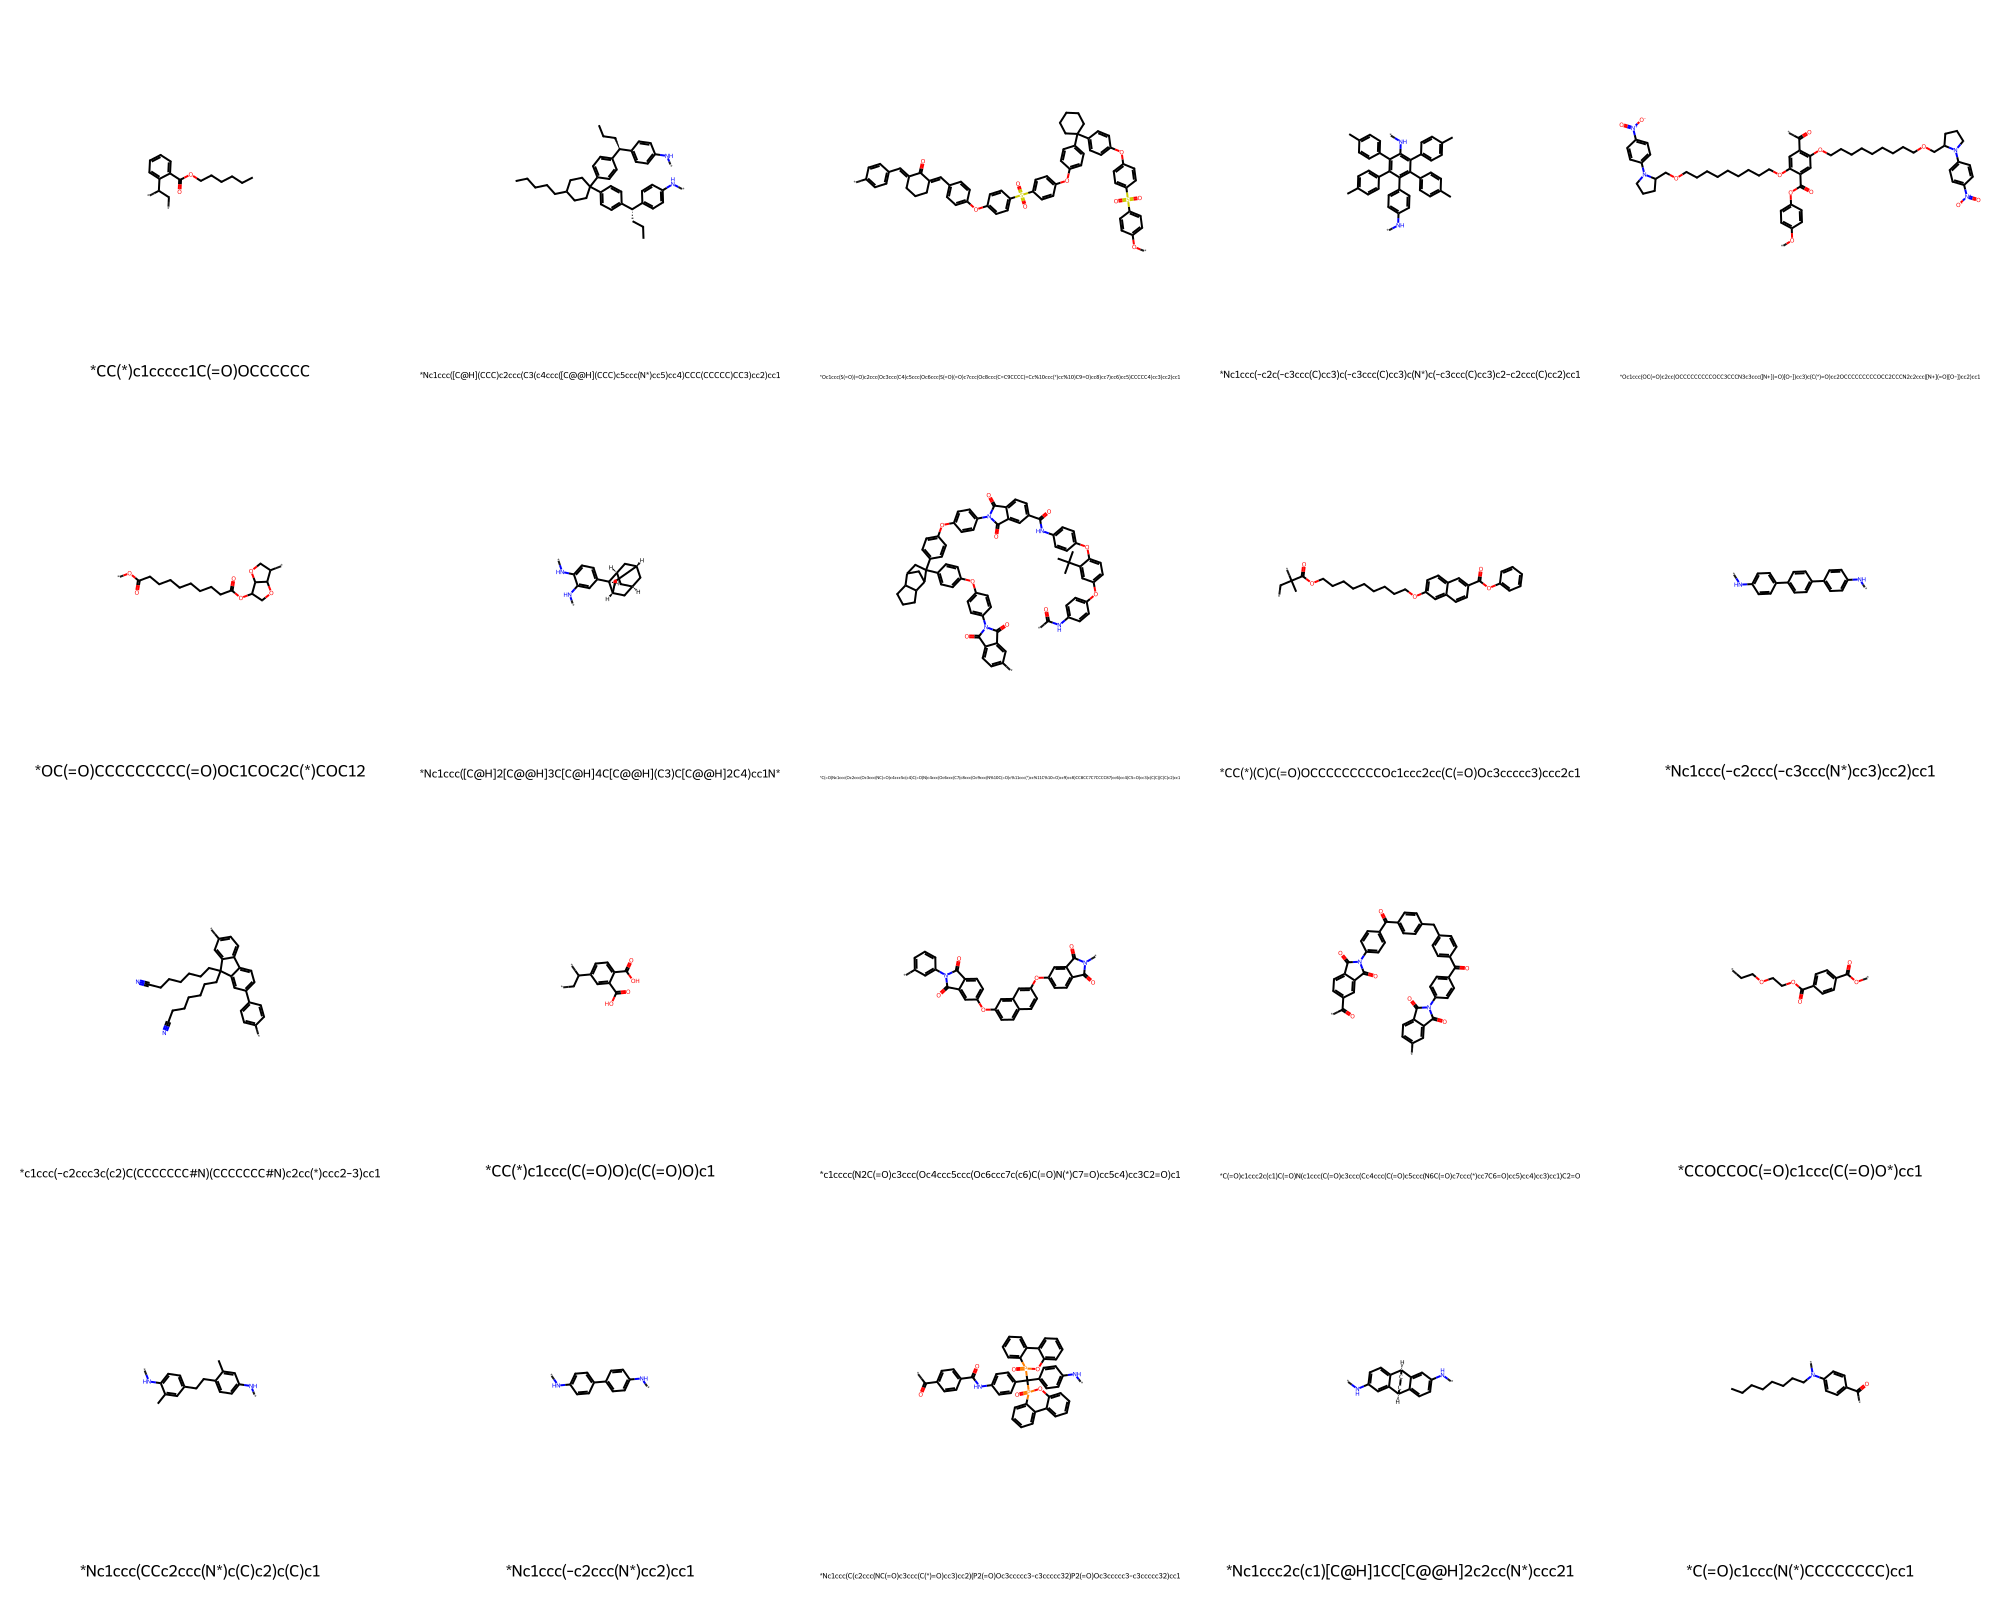

In [3]:
#!pip install rdkit

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import MolToSmiles


mol_list = []

for c in df['SMILES']:
    mol = Chem.MolFromSmiles(c)
    mol_list.append(mol)

names = [Chem.MolToSmiles(mol) for mol in mol_list if mol is not None]
    

mol_list
# Display first 10 molecules

img = Draw.MolsToGridImage(
    mols=mol_list[:20], # limit to first 20 for viewing
    molsPerRow=5,
    subImgSize=(400, 400),
    legends=names[:20] # matching labels
)
display(img) 




# # Example SMILES string
# smiles = "CCO"  # ethanol

# # Convert SMILES to molecule object
# mol = Chem.MolFromSmiles(smiles)

# Get all aspects of chemical structure in real life performance

<h2>
    1. Polymer Density
</h2>

In [4]:
df_polymerDen = df.drop(columns = ['Tg', 'FFV', 'Tc', 'Rg'])
df_polymerDen = df_polymerDen.dropna()

print("Total Nan value percentage:", (df_polymerDen.isna().sum()) / len(df_polymerDen))
print("Total Non-NaN values:", len(df_polymerDen) - (df_polymerDen.isna().sum()))
# print("Total Values: ", len(df_polymerDen))

display(df_polymerDen)

Total Nan value percentage: id         0.0
SMILES     0.0
Density    0.0
dtype: float64
Total Non-NaN values: id         613
SMILES     613
Density    613
dtype: int64


,id,SMILES,Density
10,2986007,*c1ccc(-c2ccc3c(c2)C(CCCCCCC#N)(CCCCCCC#N)c2cc...,0.901123
11,3013292,*CC(*)c1ccc(C(=O)O)c(C(=O)O)c1,1.184354
46,11894206,*CC(*)C(=O)Oc1ccccc1C,1.061864
64,16855553,*CC(*)C(=O)Oc1ccccc1,1.109389
88,23192453,*CC(C)S(*)(=O)=O,1.293315
...,...,...,...
7943,2141222333,*CC(*)C1CC=CCC1,0.842083
7944,2141227349,*CC(*)Cl,1.263489
7945,2141673799,*CCCCCC(=O)O*,1.002696
7952,2142796643,*CCCC(=O)NCc1ccc(CNC(=O)CCCO*)cc1,1.107946


### In this section I take the SMILES data of each atom related to Polymer Density and convert it to an RDkit Mol object that is then added to a set containing all atom symbols found in the dataset. Those symbols are then fit to the encoder using sklearns LabelEncoder function. Converting to int class values, then stored in a single list for each molecule in the dataset, for the models recognition.

In [5]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
from rdkit import Chem
from rdkit.Chem import MolToSmiles


unique_atoms = set()
for s in df_polymerDen["SMILES"]:
    mol = Chem.MolFromSmiles(s)
    if mol:
        unique_atoms.update([atom.GetSymbol() for atom in mol.GetAtoms()])

encoder = LabelEncoder()
encoder.fit(list(unique_atoms))

# Encode each SMILES into a list of ints
tokens = []
for s in df_polymerDen["SMILES"]:
    mol = Chem.MolFromSmiles(s)
    if mol: # only process valid molecules
        tokens.append(encoder.transform([atom.GetSymbol() for atom in mol.GetAtoms()]))
    else:
        tokens.append(None)

#df["SMILES_tokens"] = tokens
df_polymerDen["SMILES_tokens"] = tokens
display("df",df,"df_polymerDen", df_polymerDen)


# display(df_polymerDen)
# display(mol_tokens)

'df'

,id,SMILES,Tg,FFV,Tc,Density,Rg
0,87817,*CC(*)c1ccccc1C(=O)OCCCCCC,NaN,0.374645,0.205667,NaN,NaN
1,106919,*Nc1ccc([C@H](CCC)c2ccc(C3(c4ccc([C@@H](CCC)c5...,NaN,0.370410,NaN,NaN,NaN
2,388772,*Oc1ccc(S(=O)(=O)c2ccc(Oc3ccc(C4(c5ccc(Oc6ccc(...,NaN,0.378860,NaN,NaN,NaN
3,519416,*Nc1ccc(-c2c(-c3ccc(C)cc3)c(-c3ccc(C)cc3)c(N*)...,NaN,0.387324,NaN,NaN,NaN
4,539187,*Oc1ccc(OC(=O)c2cc(OCCCCCCCCCOCC3CCCN3c3ccc([N...,NaN,0.355470,NaN,NaN,NaN
...,...,...,...,...,...,...,...
7968,2146592435,*Oc1cc(CCCCCCCC)cc(OC(=O)c2cccc(C(*)=O)c2)c1,NaN,0.367498,NaN,NaN,NaN
7969,2146810552,*C(=O)OCCN(CCOC(=O)c1ccc2c(c1)C(=O)N(c1cccc(N3...,NaN,0.353280,NaN,NaN,NaN
7970,2147191531,*c1cc(C(=O)NCCCCCCCC)cc(N2C(=O)c3ccc(-c4ccc5c(...,NaN,0.369411,NaN,NaN,NaN
7971,2147435020,*C=C(*)c1ccccc1C,261.662355,NaN,NaN,NaN,NaN


'df_polymerDen'

,id,SMILES,Density,SMILES_tokens
10,2986007,*c1ccc(-c2ccc3c(c2)C(CCCCCCC#N)(CCCCCCC#N)c2cc...,0.901123,"[0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
11,3013292,*CC(*)c1ccc(C(=O)O)c(C(=O)O)c1,1.184354,"[0, 2, 2, 0, 2, 2, 2, 2, 2, 7, 7, 2, 2, 7, 7, 2]"
46,11894206,*CC(*)C(=O)Oc1ccccc1C,1.061864,"[0, 2, 2, 0, 2, 7, 7, 2, 2, 2, 2, 2, 2, 2]"
64,16855553,*CC(*)C(=O)Oc1ccccc1,1.109389,"[0, 2, 2, 0, 2, 7, 7, 2, 2, 2, 2, 2, 2]"
88,23192453,*CC(C)S(*)(=O)=O,1.293315,"[0, 2, 2, 2, 8, 0, 7, 7]"
...,...,...,...,...
7943,2141222333,*CC(*)C1CC=CCC1,0.842083,"[0, 2, 2, 0, 2, 2, 2, 2, 2, 2]"
7944,2141227349,*CC(*)Cl,1.263489,"[0, 2, 2, 0, 3]"
7945,2141673799,*CCCCCC(=O)O*,1.002696,"[0, 2, 2, 2, 2, 2, 2, 7, 7, 0]"
7952,2142796643,*CCCC(=O)NCc1ccc(CNC(=O)CCCO*)cc1,1.107946,"[0, 2, 2, 2, 2, 7, 6, 2, 2, 2, 2, 2, 2, 6, 2, ..."


In [6]:
# Clearing SMILES strings for token values
# Generate Morgan fingerprints and convert them to 2048 bit vectors to be fed as chemical structure predictors for the model
# Separate Low Densities and High Density values at 1.1 threshold

from rdkit import Chem, DataStructs
from rdkit.Chem import rdFingerprintGenerator
import numpy as np
from sklearn.preprocessing import StandardScaler

ndf_polymerDen = df_polymerDen.drop(columns = ["SMILES", "id"])

def smiles_to_fingerprints(smiles_list, densities, radius=2, nBits=2048, threshold=1.1):
    
    morgan_gen = rdFingerprintGenerator.GetMorganGenerator(radius=radius, fpSize=nBits)
    
    fp_array_lowDen = []
    fp_array_highDen = []
    
    for smi, den in zip(smiles_list, densities):
        mol = Chem.MolFromSmiles(smi)
        if mol:
            fp = morgan_gen.GetFingerprint(mol)
            arr = np.zeros((nBits,), dtype=int)
            DataStructs.ConvertToNumpyArray(fp, arr)
            
            if den <= threshold:
                fp_array_lowDen.append(arr)
            else:
                fp_array_highDen.append(arr)
    
    return np.array(fp_array_lowDen), np.array(fp_array_highDen)

# Usage
lowDen_fp, highDen_fp = smiles_to_fingerprints(
    df_polymerDen["SMILES"].tolist(),
    df_polymerDen["Density"].tolist()
)

print(lowDen_fp.shape, highDen_fp.shape)


(512, 2048) (101, 2048)


In [7]:
# Generate Morgan fingerprints and convert them to 2048 bit vectors to be fed as chemical structure predictors for the model
# from rdkit import Chem, DataStructs
# from rdkit.Chem import rdFingerprintGenerator
# import numpy as np
# from sklearn.preprocessing import StandardScaler

# def smiles_to_fingerprints(smiles_list, radius=2, nBits=2048):
    
#     morgan_gen = rdFingerprintGenerator.GetMorganGenerator(radius=radius, fpSize=nBits)

#     fp_array = np.zeros((len(smiles_list), nBits), dtype=int) #empty array to hold bit vectors
    
#     for i, smi in enumerate(smiles_list):
#         mol = Chem.MolFromSmiles(smi)
#         if mol:
#           fp = morgan_gen.GetFingerprint(mol)
#           DataStructs.ConvertToNumpyArray(fp, fp_array[i])
    
#     return fp_array

# # Usage

# # fingerprints = smiles_to_fingerprints(df["SMILES"])
# fingerprints = pd.DataFrame(smiles_to_fingerprints(df["SMILES"]), index = df.index)

# print(fingerprints)

In [8]:
scaler = StandardScaler()
threshold = 1.1
density_feature_1 = []
density_feature_2 = []

for smi in df_polymerDen["Density"].values:
    if smi <= threshold:
        density_feature_1.append(smi)
    else: 
        density_feature_2.append(smi)

density_feature_1 = np.array(density_feature_1)
density_feature_2 = np.array(density_feature_2)

density_feature_1 = density_feature_1.reshape(-1, 1)
density_feature_2 = density_feature_2.reshape(-1, 1)

print(density_feature_1)
print(density_feature_2)

[[0.9011228 ]
 [1.06186414]
 [0.83046367]
 [0.79718317]
 [0.7966448 ]
 [0.81714613]
 [1.06572076]
 [1.08538797]
 [0.77193413]
 [0.91386168]
 [1.07313828]
 [0.82666016]
 [0.89295665]
 [0.93963594]
 [1.00613539]
 [0.95574334]
 [0.88914362]
 [0.9698324 ]
 [0.88925168]
 [0.89522718]
 [1.09273565]
 [1.05160903]
 [0.86635143]
 [0.8564105 ]
 [0.88351137]
 [0.91067864]
 [1.04800059]
 [0.77689597]
 [0.91413913]
 [0.99612855]
 [0.81422642]
 [1.01347137]
 [0.96010193]
 [1.0222365 ]
 [1.09451375]
 [0.99179579]
 [0.90961295]
 [1.08919461]
 [0.89932231]
 [1.05088722]
 [1.03947654]
 [1.0704087 ]
 [0.95540928]
 [1.08120674]
 [0.93331739]
 [1.04256274]
 [0.89971642]
 [0.78650326]
 [1.08181324]
 [0.96251177]
 [0.95236304]
 [0.94662428]
 [0.94056998]
 [0.94187016]
 [1.08687578]
 [0.89338967]
 [1.0938594 ]
 [0.95804452]
 [0.80672921]
 [0.90698627]
 [1.04035121]
 [0.91997566]
 [1.04854398]
 [0.92947228]
 [0.98541293]
 [0.99248869]
 [0.86119717]
 [0.89407952]
 [0.92848585]
 [1.05656587]
 [0.84861752]
 [0.90

In [9]:
# Concatenate Density and Fingerprint to singular input np array, low density submodel
X = np.hstack([density_feature_1, lowDen_fp])

print(X)
print(X.shape)

[[0.9011228  0.         1.         ... 0.         0.         0.        ]
 [1.06186414 0.         1.         ... 0.         0.         0.        ]
 [0.83046367 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.84208322 0.         1.         ... 0.         0.         0.        ]
 [1.00269573 0.         0.         ... 0.         0.         0.        ]
 [0.98260248 0.         0.         ... 0.         0.         0.        ]]
(512, 2049)


## Training Submodel for <= 1.1 Density

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

threshold = 1.1
y = []

for smi in df_polymerDen["Density"].values:
    if smi <= threshold:
        y.append(smi)                   # target (continuous)

# Split train/test
# X_train = 70% of all np_array of density values and fingerprints for each molecules
#X_test = 30% of all np_array of density values and fingerprints for each molecules

# y_train = den
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Fit regression model
reg = RandomForestRegressor(n_estimators=1000, random_state=42)
reg.fit(X_train, y_train)


# Evaluate Model Predictions
# R^2 Score
# Mean absolute error
# Root mean squared error
y_pred = reg.predict(X_test)
mse =  mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 

print("R² score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", rmse)


R² score: 0.9998949658201415
MAE: 0.000528588302116942
RMSE: 0.0007638105718224684


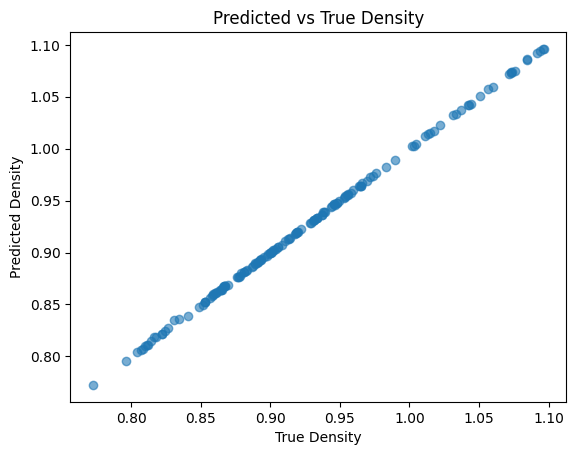

In [11]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("True Density")
plt.ylabel("Predicted Density")
plt.title("Predicted vs True Density")
plt.show()


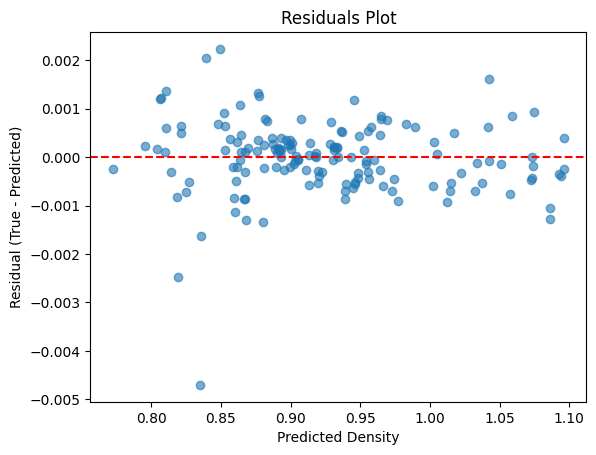

In [12]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Density")
plt.ylabel("Residual (True - Predicted)")
plt.title("Residuals Plot")
plt.show()


In [13]:
# per-bin MAE to quantify where errors grow
bins = np.linspace(min(y_test), max(y_test), 8)   # change 8 to more bins if needed
df_err = pd.DataFrame({'y': y_test, 'res': np.abs(residuals)})
df_err['bin'] = pd.cut(df_err['y'], bins=bins, include_lowest=True)
bin_stats = df_err.groupby('bin')['res'].agg(['mean','count']).reset_index()
print(bin_stats)

              bin      mean  count
0  (0.771, 0.819]  0.000794     11
1  (0.819, 0.865]  0.000890     22
2  (0.865, 0.911]  0.000400     42
3  (0.911, 0.958]  0.000355     38
4  (0.958, 1.004]  0.000576     15
5   (1.004, 1.05]  0.000558     12
6   (1.05, 1.096]  0.000534     14


/var/folders/6d/_lkvnlt14pl9_6lh72zwq1ph0000gn/T/ipykernel_17531/3596574776.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_stats = df_err.groupby('bin')['res'].agg(['mean','count']).reset_index()


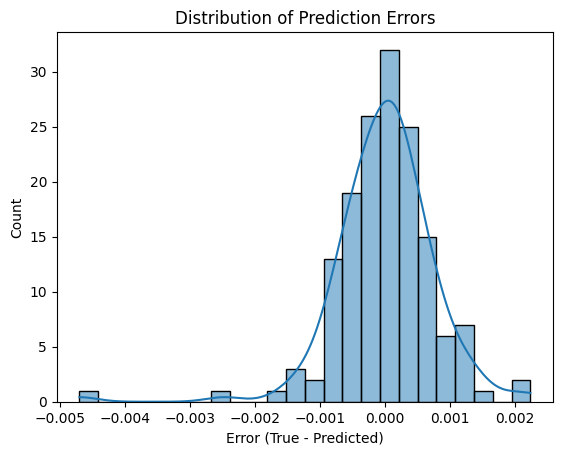

In [14]:
import seaborn as sns

sns.histplot(residuals, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (True - Predicted)")
plt.show()


## Plotting bin vs mean to better visualize errors

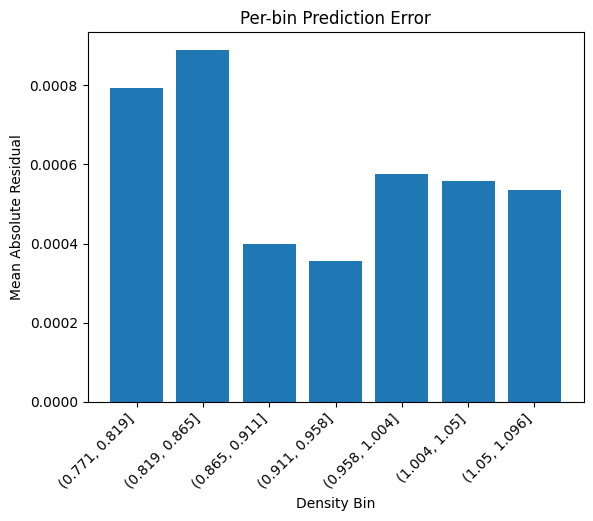

In [15]:

plt.bar(bin_stats['bin'].astype(str), bin_stats['mean'])
plt.xticks(rotation=45, ha='right')
plt.ylabel("Mean Absolute Residual")
plt.xlabel("Density Bin")
plt.title("Per-bin Prediction Error")
plt.show()


## Training Submodel for > 1.2 Density

In [16]:
# Concatenate Density and Fingerprint to singular input np array, low density submodel
X_2 = np.hstack([density_feature_2, highDen_fp])

print(X_2)
print(X_2.shape)

[[1.18435401 0.         1.         ... 0.         0.         0.        ]
 [1.10938862 0.         1.         ... 0.         0.         0.        ]
 [1.29331452 0.         1.         ... 0.         0.         0.        ]
 ...
 [1.16281981 0.         0.         ... 0.         0.         0.        ]
 [1.26348937 0.         1.         ... 0.         0.         0.        ]
 [1.10794641 0.         0.         ... 0.         0.         0.        ]]
(101, 2049)


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

threshold = 1.1
y_2 = []

for smi in df_polymerDen["Density"].values:
    if smi > threshold:
        y_2.append(smi)                   # target (continuous)

# Split train/test
# X_train = 70% of all np_array of density values and fingerprints for each molecules
#X_test = 30% of all np_array of density values and fingerprints for each molecules

# y_train = den
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.3, random_state=42)


# Fit regression model
reg = RandomForestRegressor(n_estimators=1000, random_state=42)
reg.fit(X_train, y_train)


# Evaluate Model Predictions
# R^2 Score
# Mean absolute error
# Root mean squared error
y_pred = reg.predict(X_test)
mse =  mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 

print("R² score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", rmse)


R² score: 0.9954869668069204
MAE: 0.0048224279769992625
RMSE: 0.008009497604858692


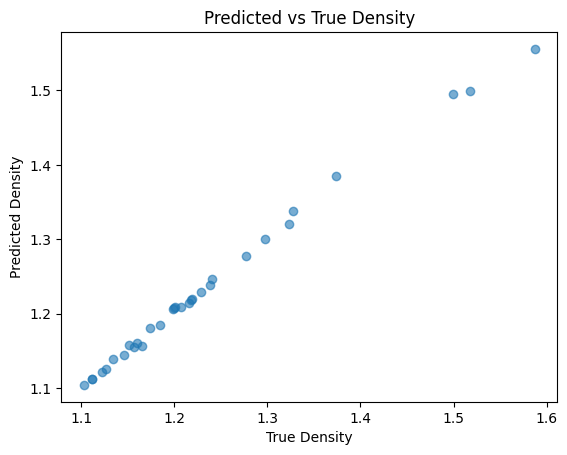

In [18]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("True Density")
plt.ylabel("Predicted Density")
plt.title("Predicted vs True Density")
plt.show()


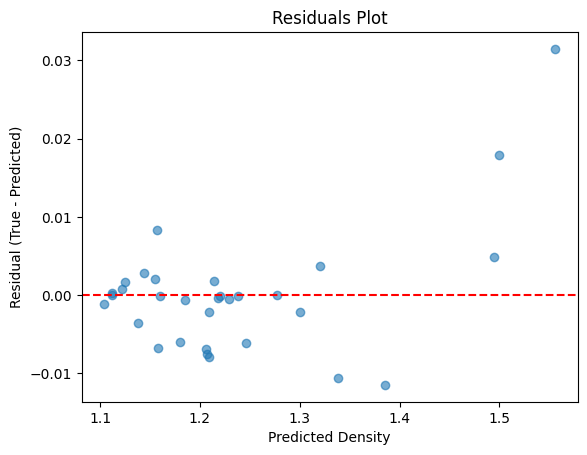

In [19]:


residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Density")
plt.ylabel("Residual (True - Predicted)")
plt.title("Residuals Plot")
plt.show()


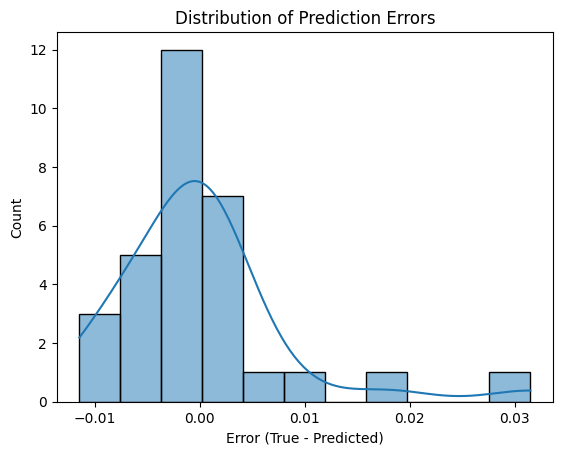

In [20]:
import seaborn as sns

sns.histplot(residuals, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (True - Predicted)")
plt.show()


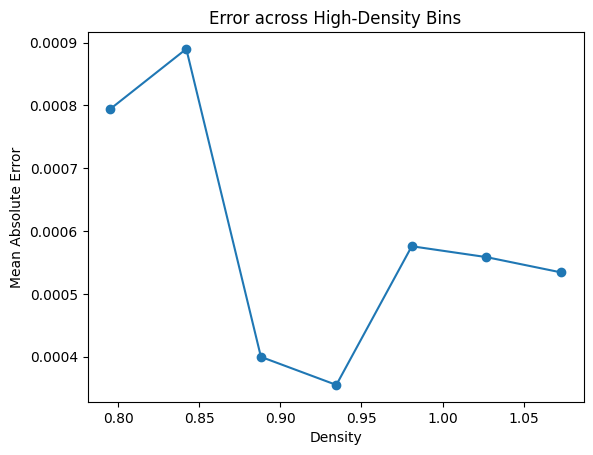

In [21]:
bin_stats['bin_center'] = bin_stats['bin'].apply(lambda x: x.mid)
plt.plot(bin_stats['bin_center'], bin_stats['mean'], marker='o')
plt.xlabel("Density")
plt.ylabel("Mean Absolute Error")
plt.title("Error across High-Density Bins")
plt.show()

In [22]:
# per-bin MAE to quantify where errors grow
bins = np.linspace(min(y_test), max(y_test), 10)   # change 8 to more bins if needed
df_err = pd.DataFrame({'y': y_test, 'res': np.abs(residuals)})
df_err['bin'] = pd.cut(df_err['y'], bins=bins, include_lowest=True)
bin_stats = df_err.groupby('bin')['res'].agg(['mean','count']).reset_index()
print(bin_stats)


              bin      mean  count
0  (1.102, 1.157]  0.002114      8
1  (1.157, 1.211]  0.004600      9
2  (1.211, 1.264]  0.001498      6
3  (1.264, 1.318]  0.001104      2
4  (1.318, 1.372]  0.007153      2
5  (1.372, 1.426]  0.011465      1
6   (1.426, 1.48]       NaN      0
7   (1.48, 1.533]  0.011368      2
8  (1.533, 1.587]  0.031479      1


/var/folders/6d/_lkvnlt14pl9_6lh72zwq1ph0000gn/T/ipykernel_17531/3757825899.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_stats = df_err.groupby('bin')['res'].agg(['mean','count']).reset_index()


<h2>
    2. Thermal Conductivity
</h2>

In [23]:
df_thermal = df.drop(columns = ['Tg', 'FFV', 'Density', 'Rg'])
df_thermal = df_thermal.dropna()


print("Total Nan value percentage:", (df_thermal.isna().sum()) / len(df_thermal))
# print("Total Non-NaN values:", len(df_thermal) - (df_thermal.isna().sum()))
# print("Total Values: ", len(df_thermal))

display(df_thermal)

Total Nan value percentage: id        0.0
SMILES    0.0
Tc        0.0
dtype: float64


,id,SMILES,Tc
0,87817,*CC(*)c1ccccc1C(=O)OCCCCCC,0.205667
10,2986007,*c1ccc(-c2ccc3c(c2)C(CCCCCCC#N)(CCCCCCC#N)c2cc...,0.487000
11,3013292,*CC(*)c1ccc(C(=O)O)c(C(=O)O)c1,0.171000
31,6645418,*CCCCCNC(=O)CCCCC(=O)N*,0.327000
34,7687820,*CCCCCCCCCCCCCCCCCCNC(=O)NCCCCCCNC(=O)N*,0.383000
...,...,...,...
7899,2127233037,*CCN(*)C(=O)CCCCCCCCCCCCCCC,0.336000
7905,2128237869,*CC(*)c1ccccc1F,0.174667
7943,2141222333,*CC(*)C1CC=CCC1,0.180750
7944,2141227349,*CC(*)Cl,0.139000


<h2>
    3. Glass Transition Temperature
</h2>

In [24]:
df_glassTrans = df.drop(columns = ['Density', 'FFV', 'Tc', 'Rg'])
df_glassTrans = df_glassTrans.dropna()

print("Total Non-NaN values:", len(df_glassTrans) - (df_glassTrans.isna().sum()))
print("Total Values: ", len(df_glassTrans))

display(df_glassTrans)

Total Non-NaN values: id        511
SMILES    511
Tg        511
dtype: int64
Total Values:  511


,id,SMILES,Tg
40,10142210,*NC(C)C(=O)NCC(=O)NCC(*)=O,208.639749
57,13838538,*CCCCCCSSCCCCSS*,-41.266724
63,16498242,*C=CCCCCCCCC*,-17.282022
108,30582999,*CCCCCCCCCCOC(=O)c1ccc(C(=O)NCCNC(=O)c2ccc(C(=...,4.250403
123,36217683,*c1nc2cc3sc(-c4cc(OCCCCCC)c(*)cc4OCCCCCC)nc3cc2s1,168.526313
...,...,...,...
7863,2116365788,*Nc1cc(SCCC#N)c(NC(=O)c2cccc(C(*)=O)c2)cc1SCCC#N,38.160660
7868,2117950580,*c1ccc(C2C(C(=O)OCC)C(*)C2C(=O)OCC)cc1,164.322463
7889,2124040823,*Oc1ccc(C=Cc2ccc(C=Cc3ccc(OC(=O)CCCCCCCCC(*)=O...,35.475235
7911,2130807414,*CC(*)C(=O)OCC1(C)COC(C)(C)OC1,95.741049


<h2>
    4. Radius of Gyration
</h2>

In [25]:
#Fundamental molecular size and packing efficiency (Radius of Gyration)

df_radiusGy = df.drop(columns = ['Tg', 'FFV', 'Tc', 'Density'])
df_radiusGy = df_radiusGy.dropna()

print("Total Non-NaN values:", len(df_radiusGy) - (df_radiusGy.isna().sum()))
print("Total Values: ", len(df_radiusGy))

display(df_radiusGy)

Total Non-NaN values: id        614
SMILES    614
Rg        614
dtype: int64
Total Values:  614


,id,SMILES,Rg
10,2986007,*c1ccc(-c2ccc3c(c2)C(CCCCCCC#N)(CCCCCCC#N)c2cc...,28.682441
11,3013292,*CC(*)c1ccc(C(=O)O)c(C(=O)O)c1,13.534248
37,9231170,*CC(*)CC,13.872913
46,11894206,*CC(*)C(=O)Oc1ccccc1C,12.737463
64,16855553,*CC(*)C(=O)Oc1ccccc1,13.435339
...,...,...,...
7943,2141222333,*CC(*)C1CC=CCC1,12.703534
7944,2141227349,*CC(*)Cl,21.121972
7945,2141673799,*CCCCCC(=O)O*,18.833676
7952,2142796643,*CCCC(=O)NCc1ccc(CNC(=O)CCCO*)cc1,20.187782


<h2>
    5. Fractional Free Volume
</h2>

In [26]:
df_polymerFFV = df.drop(columns = ['Tg', 'Density', 'Tc', 'Rg'])
df_polymerFFV = df_polymerFFV.dropna()

print("Total Non-NaN values:", len(df_polymerFFV) - (df_polymerFFV.isna().sum()))
print("Total Values: ", len(df_polymerFFV))

display(df_polymerFFV)

Total Non-NaN values: id        7030
SMILES    7030
FFV       7030
dtype: int64
Total Values:  7030


,id,SMILES,FFV
0,87817,*CC(*)c1ccccc1C(=O)OCCCCCC,0.374645
1,106919,*Nc1ccc([C@H](CCC)c2ccc(C3(c4ccc([C@@H](CCC)c5...,0.370410
2,388772,*Oc1ccc(S(=O)(=O)c2ccc(Oc3ccc(C4(c5ccc(Oc6ccc(...,0.378860
3,519416,*Nc1ccc(-c2c(-c3ccc(C)cc3)c(-c3ccc(C)cc3)c(N*)...,0.387324
4,539187,*Oc1ccc(OC(=O)c2cc(OCCCCCCCCCOCC3CCCN3c3ccc([N...,0.355470
...,...,...,...
7967,2146213237,*CCOC(=O)c1ccc(C(C#N)=C(c2ccc(OC)cc2)N2CCC(*)C...,0.385608
7968,2146592435,*Oc1cc(CCCCCCCC)cc(OC(=O)c2cccc(C(*)=O)c2)c1,0.367498
7969,2146810552,*C(=O)OCCN(CCOC(=O)c1ccc2c(c1)C(=O)N(c1cccc(N3...,0.353280
7970,2147191531,*c1cc(C(=O)NCCCCCCCC)cc(N2C(=O)c3ccc(-c4ccc5c(...,0.369411


In [27]:
#Remove all NaN values that could hinder model performance


In [28]:
#Scale data for model predictions

In [29]:
#Make it effective and consisent for multiple runs within Molecular Dynamic Simulations

## Evaluation Metric
### Weighted Mean Absolute Error (wMAE) across the five polymer properties
